# 电商虚拟数据集生成

In [14]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import string

def generate_realistic_ecommerce_data():
    """
    生成符合真实业务场景的电商数据
    """
    
    # 设置随机种子保证可重复性
    np.random.seed(42)
    random.seed(42)
    
    print("正在生成电商数据...")
    
    # 1. 用户维度表
    n_customers = 5000
    customers_data = []
    
    for i in range(1, n_customers + 1):
        # 生成一些缺失值
        has_email = random.random() > 0.05
        has_phone = random.random() > 0.07
        has_birth_year = random.random() > 0.03
        
        # 生成一些异常值
        if has_birth_year:
            if random.random() < 0.02:
                birth_year = random.choice([1800, 1850, 1900, 2025, 2030])
            else:
                birth_year = np.random.randint(1970, 2005)
        else:
            birth_year = None
        
        # 数据格式不一致
        gender_options = ['Male', 'Female', 'male', 'female', 'M', 'F', '未知', '']
        gender = random.choice(gender_options)
        
        email = f'user{i}@example.com' if has_email else None
        if not has_email and random.random() < 0.01:
            email = f'invalid_email_{i}'
        
        phone = f'1{np.random.randint(300,999):03d}{np.random.randint(1000,9999):04d}' if has_phone else None
        
        # 重复数据
        customer_id = i
        if random.random() < 0.005 and i > 100:
            customer_id = random.randint(1, 100)
        
        # 不一致的数据
        countries = ['USA', 'US', 'United States', '美国', '', 'CANADA', 'UK', 'GB', 'Australia', 'AU']
        cities = ['New York', 'NY', 'New York City', '纽约', 'Los Angeles', 'LA', 'London', 'LON', 'Sydney', 'SYD']
        
        customers_data.append({
            'customer_id': customer_id,
            'customer_name': random.choice([f'User_{i}', f'user {i}', f'USER-{i}', f'用户{i}']),
            'gender': gender,
            'birth_year': birth_year,
            'registration_date': pd.to_datetime([datetime(2020,1,1) + timedelta(days=np.random.randint(0, 1460)) for _ in range(1)])[0],
            'email': email,
            'phone': phone,
            'country': random.choice(countries),
            'city': random.choice(cities),
            'zip_code': random.choice([f'{np.random.randint(10000, 99999)}', '00000', 'N/A', '']),
            'registration_channel': random.choice(['Web', 'Mobile App', 'Social Media', 'Referral', 'web', 'mobile', '']),
            'loyalty_tier': random.choice(['Bronze', 'Silver', 'Gold', 'Platinum', 'bronze', 'silver', '', 'VIP']),
            'preferred_category': random.choice(['Electronics', 'Clothing', 'Home', 'Books', 'Sports', '']),
            'avg_order_value_segment': random.choice(['Low', 'Medium', 'High', 'low', 'medium', 'high', '']),
            'last_login_date': None,
            'total_orders': 0,
            'total_spent': 0.0
        })
    
    customers = pd.DataFrame(customers_data)
    
    # 2. 商品维度表
    n_products = 200
    categories = {
        'Electronics': ['Smartphone', 'Laptop', 'Tablet', 'Headphones', 'Smartwatch'],
        'Clothing': ['T-Shirt', 'Jeans', 'Dress', 'Jacket', 'Shoes'],
        'Home': ['Furniture', 'Kitchenware', 'Decor', 'Lighting', 'Bedding'],
        'Books': ['Fiction', 'Non-Fiction', 'Academic', 'Children', 'Cookbook'],
        'Sports': ['Equipment', 'Apparel', 'Footwear', 'Accessories']
    }
    
    products_data = []
    product_id = 1
    
    for category, subcategories in categories.items():
        for subcategory in subcategories:
            for i in range(n_products // (len(categories) * len(subcategories))):
                if random.random() < 0.03:
                    price = random.choice([-100, -50, 0, 0.01, 999999])
                else:
                    price = round(np.random.uniform(10, 500), 2)
                
                if random.random() < 0.02:
                    stock_quantity = random.choice([-100, -10, 1000000])
                else:
                    stock_quantity = np.random.randint(0, 1000)
                
                has_brand = random.random() > 0.04
                has_supplier = random.random() > 0.05
                
                rating_options = [round(np.random.uniform(3.0, 5.0), 1), 'N/A', '', '五星', 0, 6.0]
                rating = random.choice(rating_options)
                
                products_data.append({
                    'product_id': product_id,
                    'product_name': random.choice([
                        f'{subcategory} Model {product_id}',
                        f'{subcategory.lower()} {product_id}',
                        f'{subcategory} {product_id}',
                        f'{product_id}{subcategory}'
                    ]),
                    'category': random.choice([category, category.lower(), category.upper(), '']),
                    'subcategory': subcategory,
                    'brand': random.choice(['BrandA', 'BrandB', 'BrandC', 'BrandD', 'BrandE', '']) if has_brand else None,
                    'price': price,
                    'cost_price': round(np.random.uniform(5, 300), 2) if price > 0 else None,
                    'stock_quantity': stock_quantity,
                    'supplier': f'Supplier_{np.random.randint(1, 20)}' if has_supplier else None,
                    'rating': rating,
                    'review_count': np.random.randint(0, 500),
                    'created_date': pd.to_datetime(datetime(2021,1,1) + timedelta(days=np.random.randint(0, 1000))),
                    'is_active': random.choice([True, False, 'Y', 'N', 1, 0])
                })
                product_id += 1
    
    products = pd.DataFrame(products_data)
    
    # 3. 时间维度表 - 修复概率之和问题
    dates = pd.date_range('2022-01-01', '2024-12-31', freq='D')
    time_dim_data = []
    
    for date in dates:
        if random.random() < 0.01:
            day_name = random.choice(['星期一', 'Monday', 'MON', ''])
        else:
            day_name = date.strftime('%A')
        
        month_name = date.strftime('%B')
        if random.random() < 0.005:
            month_name = random.choice(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', ''])
        
        # 修复这里：不要使用.astype(int)，直接使用int()
        correct_is_weekend = 1 if date.dayofweek >= 5 else 0
        
        # 有10%的概率生成错误的值
        if random.random() < 0.1:
            # 错误的值选项
            wrong_choices = [0, 1, 'Y', 'N', '']
            # 移除正确的值，确保生成的是错误的值
            if correct_is_weekend in wrong_choices:
                wrong_choices.remove(correct_is_weekend)
            is_weekend = random.choice(wrong_choices) if wrong_choices else correct_is_weekend
        else:
            is_weekend = correct_is_weekend
        
        # 修复概率之和问题：确保总和为1
        holiday_options = [0, 1, '是', '否', '']
        holiday_probs = [0.8, 0.05, 0.05, 0.05, 0.05]  # 总和为1.0
        
        time_dim_data.append({
            'date': date,
            'day': date.day,
            'month': date.month,
            'month_name': month_name,
            'quarter': date.quarter,
            'year': date.year,
            'day_of_week': date.dayofweek,
            'day_name': day_name,
            'is_weekend': is_weekend,
            'is_holiday': np.random.choice(holiday_options, p=holiday_probs)
        })
    
    time_dim = pd.DataFrame(time_dim_data)
    
    # 4. 地区维度表
    regions = pd.DataFrame({
        'region_id': range(1, 7),
        'region_name': ['North America', 'Europe', 'Asia Pacific', 'South America', 'Africa', 'Middle East'],
        'region_manager': ['Manager_A', 'Manager_B', 'Manager_C', 'Manager_D', 'Manager_E', 'Manager_F']
    })
    
    # 5. 订单事实表
    n_orders = 50000
    orders_data = []
    
    for i in range(1, n_orders + 1):
        if random.random() < 0.005:
            customer_id = np.random.randint(5001, 6000)
        else:
            customer_id = np.random.randint(1, n_customers + 1)
        
        if random.random() < 0.003:
            product_id = np.random.randint(201, 300)
        else:
            product_id = np.random.randint(1, len(products) + 1)
        
        if random.random() < 0.01:
            order_date = pd.to_datetime(random.choice([
                '2020-01-01',
                '2025-12-31',
                '1900-01-01',
                datetime(2023,1,1) + timedelta(days=np.random.randint(-365, 0))
            ]))
        else:
            order_date = pd.to_datetime(datetime(2023,1,1) + timedelta(days=np.random.randint(0, 730)))
        
        if random.random() < 0.02:
            quantity = random.choice([0, -1, -5, 1000])
        else:
            quantity = np.random.randint(1, 6)
        
        try:
            price_row = products.loc[products['product_id'] == product_id, 'price']
            if len(price_row) > 0:
                price = price_row.values[0]
                if price <= 0:
                    amount = random.choice([0, -abs(quantity * 10), quantity * 1000])
                else:
                    amount = quantity * price
            else:
                price = np.random.uniform(10, 500)
                amount = quantity * price
        except:
            price = np.random.uniform(10, 500)
            amount = quantity * price
        
        if random.random() < 0.01:
            amount = random.choice([price, quantity, price * quantity * 2, price * quantity / 2, 0])
        
        if random.random() < 0.005:
            amount = -abs(amount)
        
        has_payment_method = random.random() > 0.03
        has_shipping_method = random.random() > 0.04
        
        payment_options = ['Credit Card', 'credit card', 'CC', 'PayPal', 'paypal', 'Apple Pay', 'Google Pay', '现金', '']
        shipping_options = ['Standard', 'standard', 'STD', 'Express', 'express', 'Next Day', 'next day', '']
        status_options = ['Completed', 'completed', 'Shipped', 'shipped', 'Processing', 'processing', 
                         'Cancelled', 'cancelled', '待处理', '已取消', '']
        
        browsing_duration = np.random.randint(10, 1800)
        if random.random() < 0.02:
            browsing_duration = random.choice([0, 1, 100000, -100])
        
        click_count = np.random.randint(1, 20)
        if random.random() < 0.01:
            click_count = random.choice([0, -1, 1000])
        
        orders_data.append({
            'order_id': i,
            'customer_id': customer_id,
            'product_id': product_id,
            'order_date': order_date,
            'quantity': quantity,
            'unit_price': price,
            'amount': amount,
            'region_id': np.random.randint(1, 7),
            'payment_method': random.choice(payment_options) if has_payment_method else None,
            'shipping_method': random.choice(shipping_options) if has_shipping_method else None,
            'order_status': random.choice(status_options),
            'browsing_duration_seconds': browsing_duration,
            'click_count': click_count,
            'add_to_cart_count': np.random.randint(0, 5),
            'wishlist_added': random.choice([0, 1, 'Y', 'N', True, False]),
            'discount_applied': round(np.random.uniform(0, 0.3), 2),
            'customer_rating': random.choice([1, 2, 3, 4, 5, 0, 6, '五星', '']),
            'return_requested': random.choice([0, 1, 'Y', 'N'])
        })
    
    orders = pd.DataFrame(orders_data)
    
    # 6. 更新用户表中的聚合信息
    try:
        customer_stats = orders.groupby('customer_id').agg({
            'order_id': 'count',
            'amount': 'sum',
            'order_date': 'max'
        }).reset_index()
        
        customer_stats.columns = ['customer_id', 'total_orders_new', 'total_spent_new', 'last_order_date']
        
        customers = customers.merge(customer_stats, on='customer_id', how='left')
        
        customers['total_orders'] = customers['total_orders_new'].fillna(0)
        customers['total_spent'] = customers['total_spent_new'].fillna(0.0)
        
        mask = np.random.random(len(customers)) < 0.01
        customers.loc[mask, 'total_orders'] = -1
        customers.loc[mask, 'total_spent'] = -1000
        
        customers['last_login_date'] = customers['last_order_date']
        
        customers = customers.drop(['total_orders_new', 'total_spent_new'], axis=1)
    except Exception as e:
        print(f"更新客户统计信息时出错: {e}")
        customers['total_orders'] = 0
        customers['total_spent'] = 0.0
        customers['last_login_date'] = None
    
    # 7. 用户行为日志表
    n_behavior_logs = 100000
    behavior_logs_data = []
    
    for i in range(1, n_behavior_logs + 1):
        if random.random() < 0.01:
            customer_id = np.random.randint(5001, 6000)
        else:
            customer_id = np.random.randint(1, n_customers + 1)
        
        if random.random() < 0.008:
            product_id = np.random.randint(201, 300)
        else:
            product_id = np.random.randint(1, len(products) + 1)
        
        if random.random() < 0.01:
            timestamp = pd.to_datetime(random.choice([
                '2020-01-01',
                '2025-12-31',
                '1900-01-01',
                datetime.now() + timedelta(days=365)
            ]))
        else:
            timestamp = pd.to_datetime(datetime(2024,1,1) + timedelta(seconds=np.random.randint(0, 31536000)))
        
        has_device_type = random.random() > 0.05
        has_browser = random.random() > 0.06
        
        behavior_options = ['view', 'click', 'add_to_cart', 'purchase', 'wishlist', 'VIEW', 'CLICK', '浏览', '']
        device_options = ['Desktop', 'Mobile', 'Tablet', 'desktop', 'mobile', 'tablet', 'PC', '手机', '']
        browser_options = ['Chrome', 'Safari', 'Firefox', 'Edge', 'chrome', 'safari', 'firefox', 'edge', '浏览器', '']
        
        behavior_logs_data.append({
            'log_id': i,
            'customer_id': customer_id,
            'product_id': product_id,
            'behavior_type': random.choice(behavior_options),
            'timestamp': timestamp,
            'session_id': random.choice([f'session_{np.random.randint(1, 10000)}', 
                                        f'SESSION-{np.random.randint(1, 10000)}',
                                        f'sess_{np.random.randint(1, 10000)}',
                                        '']),
            'device_type': random.choice(device_options) if has_device_type else None,
            'browser': random.choice(browser_options) if has_browser else None
        })
    
    behavior_logs = pd.DataFrame(behavior_logs_data)
    
    # 8. 添加重复数据
    n_duplicate_orders = int(n_orders * 0.003)
    if n_duplicate_orders > 0:
        duplicate_indices = np.random.choice(orders.index, n_duplicate_orders, replace=False)
        duplicates = orders.loc[duplicate_indices].copy()
        for idx, row in duplicates.iterrows():
            if random.random() < 0.5:
                row['order_id'] = row['order_id'] + 1000000
        orders = pd.concat([orders, duplicates], ignore_index=True)
    
    n_duplicate_logs = int(n_behavior_logs * 0.005)
    if n_duplicate_logs > 0:
        duplicate_indices = np.random.choice(behavior_logs.index, n_duplicate_logs, replace=False)
        duplicates = behavior_logs.loc[duplicate_indices].copy()
        behavior_logs = pd.concat([behavior_logs, duplicates], ignore_index=True)
    
    # 9. 添加格式不一致的数据
    date_formats = ['2020-01-01', '01/01/2020', '2020.01.01', 'Jan 1, 2020', '20200101']
    for i in range(int(len(customers) * 0.01)):
        idx = np.random.randint(0, len(customers))
        customers.at[idx, 'registration_date'] = random.choice(date_formats)
    
    for i in range(int(len(orders) * 0.005)):
        idx = np.random.randint(0, len(orders))
        orders.at[idx, 'amount'] = f"${orders.at[idx, 'amount']}"
    
    # 10. 添加空格问题
    for i in range(int(len(customers) * 0.02)):
        idx = np.random.randint(0, len(customers))
        customers.at[idx, 'customer_name'] = f"  {customers.at[idx, 'customer_name']}  "
    
    for i in range(int(len(products) * 0.01)):
        idx = np.random.randint(0, len(products))
        products.at[idx, 'product_name'] = f" {products.at[idx, 'product_name']} "
    
    print("数据生成完成！")
    
    return {
        'customers': customers,
        'products': products,
        'time_dim': time_dim,
        'regions': regions,
        'orders': orders,
        'behavior_logs': behavior_logs
    }

# 生成数据
data_dict = generate_realistic_ecommerce_data()

# 保存数据到CSV文件
for table_name, table_data in data_dict.items():
    table_data.to_csv(f'{table_name}.csv', index=False, encoding='utf-8-sig')
    print(f"✅ 已保存: {table_name}.csv ({len(table_data)} 行)")

print("\n🎯 所有数据已生成并保存为CSV文件！")

正在生成电商数据...
数据生成完成！
✅ 已保存: customers.csv (5000 行)
✅ 已保存: products.csv (200 行)
✅ 已保存: time_dim.csv (1096 行)
✅ 已保存: regions.csv (6 行)
✅ 已保存: orders.csv (50150 行)
✅ 已保存: behavior_logs.csv (100500 行)

🎯 所有数据已生成并保存为CSV文件！


# 原始数据集数据质量报告

🔍 Starting Advanced Data Quality Check...
✅ Loaded: customers.csv (5000 rows)
✅ Loaded: products.csv (200 rows)
✅ Loaded: time_dim.csv (1096 rows)
✅ Loaded: regions.csv (6 rows)
✅ Loaded: orders.csv (50150 rows)
✅ Loaded: behavior_logs.csv (100500 rows)

📊 Advanced Quality Scoring System
📋 CUSTOMERS: 82.0/100
   - 完整性: 91.9/100
   - 唯一性: 100.0/100
   - 有效性: 33.3/100
   - 准确性: 93.7/100
📋 PRODUCTS: 82.8/100
   - 完整性: 93.3/100
   - 唯一性: 100.0/100
   - 有效性: 46.2/100
   - 准确性: 87.5/100
📋 TIME_DIM: 92.5/100
   - 完整性: 99.4/100
   - 唯一性: 100.0/100
   - 有效性: 70.0/100
   - 准确性: 96.4/100
📋 REGIONS: 86.7/100
   - 完整性: 100.0/100
   - 唯一性: 100.0/100
   - 有效性: 33.3/100
   - 准确性: 100.0/100
📋 ORDERS: 91.3/100
   - 完整性: 97.2/100
   - 唯一性: 99.7/100
   - 有效性: 66.7/100
   - 准确性: 96.7/100
📋 BEHAVIOR_LOGS: 84.9/100
   - 完整性: 91.6/100
   - 唯一性: 99.5/100
   - 有效性: 37.5/100
   - 准确性: 100.0/100

🔍 Outlier and Issue Detection

📋 CUSTOMERS:
   ⚠️  missing_values: 7,616
   ⚠️  invalid_age: 107
   ⚠️  negative_order

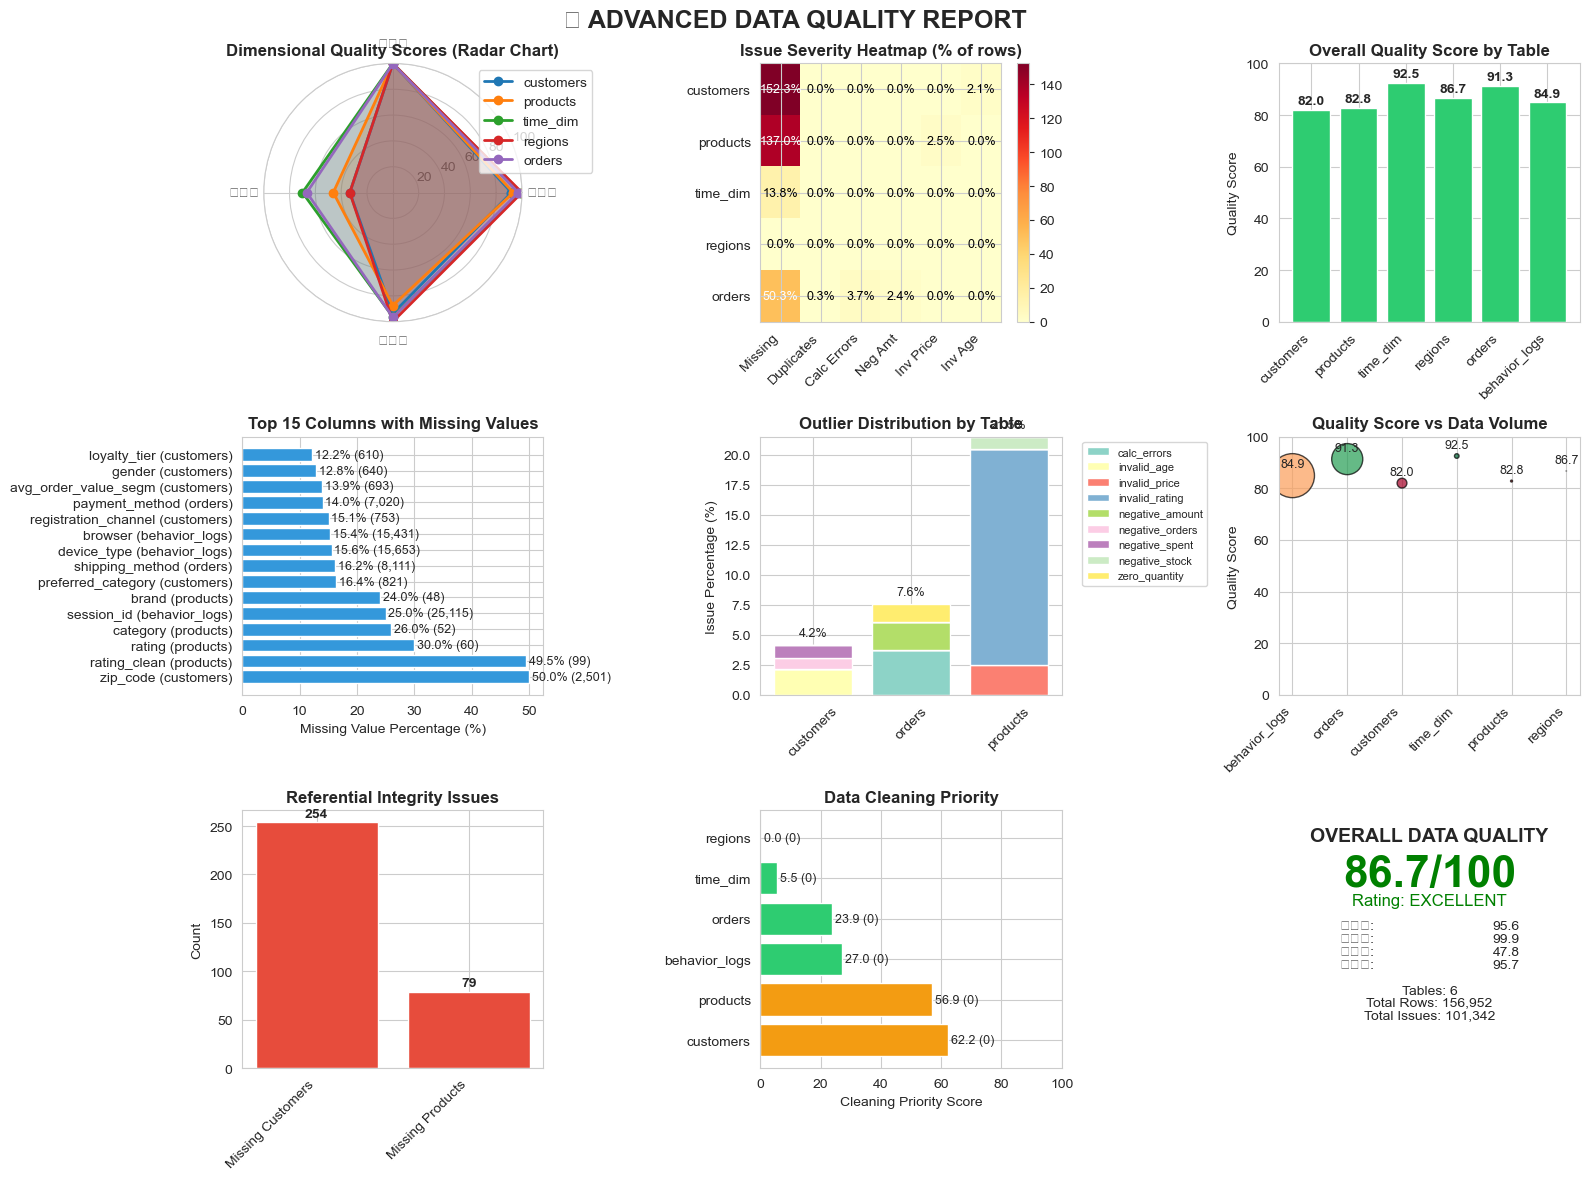


📋 ADVANCED DATA QUALITY REPORT SUMMARY

📊 Data Scale:
   Total Tables: 6
   Total Rows: 156,952
   Total Columns: 80
   Total Cells: 12,556,160

⚠️  Critical Issues Found:
   Missing Values: 100,692
   Duplicate Rows: 650
   Calculation Errors: 1,870
   Negative Amounts: 1,186

🔍 Table-by-Table Analysis:

🔗 Referential Integrity:
   Orders referencing missing customers: 254
   Orders referencing missing products: 79

🎯 Overall Quality Assessment:
   Overall Score: 86.7/100
   Rating: EXCELLENT

💡 Recommendations:
   ✅ Data quality is good. Maintain current data governance practices.

✅ Advanced Data Quality Check Completed!


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# 设置可视化样式
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Arial', 'Helvetica']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

print("🔍 Starting Advanced Data Quality Check...")
print("="*70)

# 加载数据
data_dict = {}
tables = ['customers', 'products', 'time_dim', 'regions', 'orders', 'behavior_logs']

for table in tables:
    try:
        data_dict[table] = pd.read_csv(f'{table}.csv')
        print(f"✅ Loaded: {table}.csv ({len(data_dict[table])} rows)")
    except FileNotFoundError:
        print(f"❌ Not found: {table}.csv")

print("="*70)

# ============================================================================
# 1. 高级质量评分系统
# ============================================================================

def calculate_advanced_quality_score(df, table_name):
    """
    高级数据质量评分系统
    包含多个维度的质量评估
    """
    total_rows = len(df)
    total_columns = len(df.columns)
    total_cells = total_rows * total_columns
    
    scores = {}
    weights = {}
    
    # 1. 完整性 (完整性权重: 30%)
    missing_cells = df.isnull().sum().sum()
    missing_pct = (missing_cells / total_cells * 100) if total_cells > 0 else 0
    completeness_score = max(0, 100 - missing_pct)
    scores['完整性'] = completeness_score
    weights['完整性'] = 0.30
    
    # 2. 唯一性 (重复数据权重: 15%)
    duplicate_rows = df.duplicated().sum()
    duplicate_pct = (duplicate_rows / total_rows * 100) if total_rows > 0 else 0
    uniqueness_score = max(0, 100 - duplicate_pct)
    scores['唯一性'] = uniqueness_score
    weights['唯一性'] = 0.15
    
    # 3. 有效性 (数据类型、格式一致性权重: 20%)
    validity_score = 100
    type_issues = 0
    
    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                # 尝试转换为数值类型
                numeric_test = pd.to_numeric(df[col], errors='coerce')
                # 如果转换后很多值变成NaN，说明格式不一致
                if numeric_test.isna().sum() / len(df[col]) > 0.5:
                    type_issues += 1
            except:
                type_issues += 1
    
    validity_score -= (type_issues / total_columns) * 100
    scores['有效性'] = max(0, validity_score)
    weights['有效性'] = 0.20
    
    # 4. 准确性 (业务逻辑检查权重: 35%)
    accuracy_score = 100
    logic_issues = 0
    
    if table_name == 'customers':
        # 检查客户数据逻辑问题
        if 'birth_year' in df.columns:
            df['birth_year_clean'] = pd.to_numeric(df['birth_year'], errors='coerce')
            current_year = datetime.now().year
            df['age'] = current_year - df['birth_year_clean']
            invalid_age = ((df['age'] < 10) | (df['age'] > 100) | df['age'].isna()).sum()
            logic_issues += invalid_age / total_rows * 100
        
        if 'total_orders' in df.columns:
            negative_orders = (df['total_orders'] < 0).sum()
            logic_issues += negative_orders / total_rows * 50
            
        if 'total_spent' in df.columns:
            negative_spent = (df['total_spent'] < 0).sum()
            logic_issues += negative_spent / total_rows * 50
    
    elif table_name == 'products':
        if 'price' in df.columns:
            df['price_clean'] = pd.to_numeric(df['price'], errors='coerce')
            invalid_price = (df['price_clean'] <= 0).sum()
            logic_issues += invalid_price / total_rows * 100
            
        if 'stock_quantity' in df.columns:
            df['stock_clean'] = pd.to_numeric(df['stock_quantity'], errors='coerce')
            negative_stock = (df['stock_clean'] < 0).sum()
            logic_issues += negative_stock / total_rows * 100
            
        if 'rating' in df.columns:
            df['rating_clean'] = pd.to_numeric(df['rating'], errors='coerce')
            invalid_rating = ((df['rating_clean'] < 0) | (df['rating_clean'] > 5)).sum()
            logic_issues += invalid_rating / total_rows * 50
    
    elif table_name == 'orders':
        # 清理数据
        df['amount_clean'] = df['amount'].replace('[\$,]', '', regex=True).astype(float)
        df['unit_price_clean'] = pd.to_numeric(df['unit_price'], errors='coerce')
        df['quantity_clean'] = pd.to_numeric(df['quantity'], errors='coerce')
        
        # 金额计算检查
        calculated = df['unit_price_clean'] * df['quantity_clean']
        diff = abs(df['amount_clean'] - calculated)
        calc_errors = (diff > 0.01).sum()
        logic_issues += calc_errors / total_rows * 50
        
        # 异常值检查
        negative_amount = (df['amount_clean'] < 0).sum()
        logic_issues += negative_amount / total_rows * 25
        
        zero_quantity = (df['quantity_clean'] <= 0).sum()
        logic_issues += zero_quantity / total_rows * 25
        
        # 日期检查
        try:
            df['order_date_dt'] = pd.to_datetime(df['order_date'], errors='coerce')
            future_orders = (df['order_date_dt'] > pd.Timestamp('2024-12-31')).sum()
            early_orders = (df['order_date_dt'] < pd.Timestamp('2023-01-01')).sum()
            logic_issues += (future_orders + early_orders) / total_rows * 50
        except:
            pass
    
    elif table_name == 'time_dim':
        # 检查周末标识
        if 'is_weekend' in df.columns:
            df['is_weekend_clean'] = pd.to_numeric(df['is_weekend'], errors='coerce')
            weekend_errors = df['is_weekend_clean'].isna().sum()
            logic_issues += weekend_errors / total_rows * 50
    
    accuracy_score -= min(logic_issues, 100)  # 确保不超过100
    scores['准确性'] = max(0, accuracy_score)
    weights['准确性'] = 0.35
    
    # 计算加权总分
    weighted_score = sum(scores[dim] * weights[dim] for dim in scores)
    
    return {
        'total_score': round(weighted_score, 1),
        'dimension_scores': scores,
        'weights': weights,
        'metrics': {
            'missing_pct': missing_pct,
            'duplicate_pct': duplicate_pct,
            'type_issues': type_issues
        }
    }

print("\n📊 Advanced Quality Scoring System")
print("="*70)

# 计算各表质量分数
quality_results = {}
for table_name, df in data_dict.items():
    quality_results[table_name] = calculate_advanced_quality_score(df, table_name)
    result = quality_results[table_name]
    print(f"📋 {table_name.upper()}: {result['total_score']:.1f}/100")
    for dim, score in result['dimension_scores'].items():
        print(f"   - {dim}: {score:.1f}/100")

print("="*70)

# ============================================================================
# 2. 异常值检测和统计
# ============================================================================

def detect_outliers_and_issues(df, table_name):
    """
    检测异常值和业务逻辑问题
    """
    issues = {}
    
    # 通用问题检测
    issues['missing_values'] = df.isnull().sum().sum()
    issues['duplicate_rows'] = df.duplicated().sum()
    issues['total_rows'] = len(df)
    
    # 表特定问题检测
    if table_name == 'customers':
        if 'birth_year' in df.columns:
            df['birth_year_clean'] = pd.to_numeric(df['birth_year'], errors='coerce')
            current_year = datetime.now().year
            df['age'] = current_year - df['birth_year_clean']
            issues['invalid_age'] = ((df['age'] < 10) | (df['age'] > 100)).sum()
        
        if 'total_orders' in df.columns:
            issues['negative_orders'] = (df['total_orders'] < 0).sum()
            
        if 'total_spent' in df.columns:
            issues['negative_spent'] = (df['total_spent'] < 0).sum()
    
    elif table_name == 'products':
        if 'price' in df.columns:
            df['price_clean'] = pd.to_numeric(df['price'], errors='coerce')
            issues['invalid_price'] = (df['price_clean'] <= 0).sum()
            
        if 'stock_quantity' in df.columns:
            df['stock_clean'] = pd.to_numeric(df['stock_quantity'], errors='coerce')
            issues['negative_stock'] = (df['stock_clean'] < 0).sum()
            
        if 'rating' in df.columns:
            df['rating_clean'] = pd.to_numeric(df['rating'], errors='coerce')
            issues['invalid_rating'] = ((df['rating_clean'] < 0) | (df['rating_clean'] > 5)).sum()
    
    elif table_name == 'orders':
        # 清理数据
        df['amount_clean'] = df['amount'].replace('[\$,]', '', regex=True).astype(float)
        df['unit_price_clean'] = pd.to_numeric(df['unit_price'], errors='coerce')
        df['quantity_clean'] = pd.to_numeric(df['quantity'], errors='coerce')
        
        # 金额计算检查
        calculated = df['unit_price_clean'] * df['quantity_clean']
        diff = abs(df['amount_clean'] - calculated)
        issues['calc_errors'] = (diff > 0.01).sum()
        
        # 异常值检查
        issues['negative_amount'] = (df['amount_clean'] < 0).sum()
        issues['zero_quantity'] = (df['quantity_clean'] <= 0).sum()
        
        # 日期检查
        try:
            df['order_date_dt'] = pd.to_datetime(df['order_date'], errors='coerce')
            issues['future_orders'] = (df['order_date_dt'] > pd.Timestamp('2024-12-31')).sum()
            issues['early_orders'] = (df['order_date_dt'] < pd.Timestamp('2023-01-01')).sum()
        except:
            issues['date_parsing_errors'] = "Cannot parse dates"
    
    elif table_name == 'time_dim':
        if 'is_weekend' in df.columns:
            df['is_weekend_clean'] = pd.to_numeric(df['is_weekend'], errors='coerce')
            issues['weekend_format_errors'] = df['is_weekend_clean'].isna().sum()
    
    return issues

print("\n🔍 Outlier and Issue Detection")
print("="*70)

issue_results = {}
for table_name, df in data_dict.items():
    issue_results[table_name] = detect_outliers_and_issues(df, table_name)
    
    print(f"\n📋 {table_name.upper()}:")
    issues = issue_results[table_name]
    
    # 只显示有问题的指标
    problem_issues = {k: v for k, v in issues.items() if v > 0 and k not in ['total_rows']}
    
    if problem_issues:
        for issue_type, count in problem_issues.items():
            if issue_type != 'total_rows':
                print(f"   ⚠️  {issue_type}: {count:,}")
    else:
        print("   ✅ No critical issues found")

# ============================================================================
# 3. 引用完整性检查
# ============================================================================

print("\n🔗 Referential Integrity Checks")
print("="*70)

if 'orders' in data_dict and 'customers' in data_dict:
    orders_customers = set(data_dict['orders']['customer_id'].unique())
    customers_set = set(data_dict['customers']['customer_id'].unique())
    missing_customers = orders_customers - customers_set
    
    if missing_customers:
        print(f"❌ Orders reference non-existent customers: {len(missing_customers)}")
        print(f"   Example missing customer IDs: {sorted(list(missing_customers))[:10]}")
    else:
        print("✅ Order-customer referential integrity is good")

if 'orders' in data_dict and 'products' in data_dict:
    orders_products = set(data_dict['orders']['product_id'].unique())
    products_set = set(data_dict['products']['product_id'].unique())
    missing_products = orders_products - products_set
    
    if missing_products:
        print(f"❌ Orders reference non-existent products: {len(missing_products)}")
        print(f"   Example missing product IDs: {sorted(list(missing_products))[:10]}")
    else:
        print("✅ Order-product referential integrity is good")

# ============================================================================
# 4. 数据质量可视化（专注于质量问题）
# ============================================================================

print("\n📈 Generating Data Quality Visualizations...")
print("="*70)

# 创建更专业的数据质量报告
fig = plt.figure(figsize=(16, 12))
fig.suptitle('📊 ADVANCED DATA QUALITY REPORT', fontsize=18, fontweight='bold')

# 1. 各表质量评分雷达图（左上）
ax1 = plt.subplot(3, 3, 1, projection='polar')

# 选择前5个表展示
tables_to_show = list(quality_results.keys())[:5]
dimensions = ['完整性', '唯一性', '有效性', '准确性']

# 准备数据
angles = np.linspace(0, 2*np.pi, len(dimensions), endpoint=False).tolist()
angles += angles[:1]  # 闭合图形

for table_name in tables_to_show:
    scores = quality_results[table_name]['dimension_scores']
    values = [scores[dim] for dim in dimensions]
    values += values[:1]  # 闭合图形
    
    ax1.plot(angles, values, 'o-', linewidth=2, label=table_name)
    ax1.fill(angles, values, alpha=0.25)

ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(dimensions)
ax1.set_ylim(0, 100)
ax1.set_title('Dimensional Quality Scores (Radar Chart)', fontsize=12, fontweight='bold')
ax1.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

# 2. 质量问题严重程度热力图（中上）
ax2 = plt.subplot(3, 3, 2)

# 准备问题数据矩阵
issue_types = ['missing_values', 'duplicate_rows', 'calc_errors', 
               'negative_amount', 'invalid_price', 'invalid_age']
issue_matrix = []

for table_name in tables_to_show:
    issues = issue_results.get(table_name, {})
    row = [issues.get(issue_type, 0) for issue_type in issue_types]
    
    # 标准化（按表大小）
    total_rows = issues.get('total_rows', 1)
    row_normalized = [val / total_rows * 100 for val in row]
    issue_matrix.append(row_normalized)

# 创建热力图
im = ax2.imshow(issue_matrix, cmap='YlOrRd', aspect='auto')
ax2.set_xticks(range(len(issue_types)))
ax2.set_xticklabels(['Missing', 'Duplicates', 'Calc Errors', 
                    'Neg Amt', 'Inv Price', 'Inv Age'], rotation=45, ha='right')
ax2.set_yticks(range(len(tables_to_show)))
ax2.set_yticklabels(tables_to_show)
ax2.set_title('Issue Severity Heatmap (% of rows)', fontsize=12, fontweight='bold')

# 添加数值标签
for i in range(len(tables_to_show)):
    for j in range(len(issue_types)):
        text = ax2.text(j, i, f'{issue_matrix[i][j]:.1f}%',
                       ha="center", va="center", 
                       color="white" if issue_matrix[i][j] > 50 else "black",
                       fontsize=9)

plt.colorbar(im, ax=ax2)

# 3. 质量评分条形图（右上）
ax3 = plt.subplot(3, 3, 3)

table_names = list(quality_results.keys())
scores = [quality_results[t]['total_score'] for t in table_names]
colors = []
for score in scores:
    if score >= 80:
        colors.append('#2ecc71')  # 绿色
    elif score >= 60:
        colors.append('#f39c12')  # 橙色
    else:
        colors.append('#e74c3c')  # 红色

bars = ax3.bar(range(len(table_names)), scores, color=colors)
ax3.set_xticks(range(len(table_names)))
ax3.set_xticklabels(table_names, rotation=45, ha='right')
ax3.set_ylabel('Quality Score')
ax3.set_ylim(0, 100)
ax3.set_title('Overall Quality Score by Table', fontsize=12, fontweight='bold')

# 在柱子上添加分数
for bar, score in zip(bars, scores):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{score:.1f}', ha='center', va='bottom', fontweight='bold')

# 4. 缺失值分布（中左）
ax4 = plt.subplot(3, 3, 4)

missing_data = []
for table_name, df in data_dict.items():
    missing_counts = df.isnull().sum()
    missing_cols = missing_counts[missing_counts > 0]
    if len(missing_cols) > 0:
        for col, count in missing_cols.items():
            missing_data.append({
                'table': table_name,
                'column': col,
                'missing_count': count,
                'missing_pct': count/len(df)*100
            })

missing_df = pd.DataFrame(missing_data)
if not missing_df.empty:
    # 取缺失率最高的前15个字段
    top_missing = missing_df.nlargest(15, 'missing_pct')
    
    y_pos = range(len(top_missing))
    bars4 = ax4.barh(y_pos, top_missing['missing_pct'], color='#3498db')
    ax4.set_yticks(y_pos)
    ax4.set_yticklabels(top_missing['column'].str[:20] + ' (' + top_missing['table'] + ')')
    ax4.set_xlabel('Missing Value Percentage (%)')
    ax4.set_title('Top 15 Columns with Missing Values', fontsize=12, fontweight='bold')
    
    # 添加数值标签
    for i, (idx, row) in enumerate(top_missing.iterrows()):
        ax4.text(row['missing_pct'] + 0.5, i, 
                f"{row['missing_pct']:.1f}% ({row['missing_count']:,})", 
                va='center', fontsize=9)
else:
    ax4.text(0.5, 0.5, 'No missing values found', 
            ha='center', va='center', fontsize=14)
    ax4.set_title('Missing Values Analysis')

# 5. 异常值检测（中中）
ax5 = plt.subplot(3, 3, 5)

# 收集所有异常值数据
outlier_data = []
for table_name, issues in issue_results.items():
    total_rows = issues.get('total_rows', 1)
    
    # 只添加有意义的异常值
    outlier_keys = ['calc_errors', 'negative_amount', 'zero_quantity', 
                   'invalid_price', 'negative_stock', 'invalid_age', 
                   'negative_orders', 'negative_spent', 'invalid_rating']
    
    for key in outlier_keys:
        if key in issues and issues[key] > 0:
            outlier_data.append({
                'table': table_name,
                'issue_type': key,
                'count': issues[key],
                'pct': issues[key] / total_rows * 100
            })

if outlier_data:
    outlier_df = pd.DataFrame(outlier_data)
    # 分组显示
    pivot_data = outlier_df.pivot_table(
        values='pct', 
        index='table', 
        columns='issue_type', 
        aggfunc='sum',
        fill_value=0
    )
    
    # 创建堆叠条形图
    bottom = np.zeros(len(pivot_data))
    colors5 = plt.cm.Set3(np.linspace(0, 1, len(pivot_data.columns)))
    
    for i, (col_name, col_values) in enumerate(pivot_data.items()):
        ax5.bar(pivot_data.index, col_values, bottom=bottom, 
               label=col_name, color=colors5[i])
        bottom += col_values
    
    ax5.set_ylabel('Issue Percentage (%)')
    ax5.set_title('Outlier Distribution by Table', fontsize=12, fontweight='bold')
    ax5.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    ax5.tick_params(axis='x', rotation=45)
    
    # 添加总计标签
    for i, table in enumerate(pivot_data.index):
        total_pct = pivot_data.loc[table].sum()
        if total_pct > 0:
            ax5.text(i, total_pct + 0.5, f'{total_pct:.1f}%', 
                    ha='center', va='bottom', fontsize=9)
else:
    ax5.text(0.5, 0.5, 'No outliers detected', 
            ha='center', va='center', fontsize=14)
    ax5.set_title('Outlier Detection')

# 6. 数据质量趋势（中右）
ax6 = plt.subplot(3, 3, 6)

# 按数据量排序表格
table_sizes = [(table, len(data_dict[table])) for table in data_dict.keys()]
table_sizes.sort(key=lambda x: x[1], reverse=True)

sizes = [size for _, size in table_sizes]
quality_scores = [quality_results[table]['total_score'] for table, _ in table_sizes]
tables_ordered = [table for table, _ in table_sizes]

# 创建散点图
scatter = ax6.scatter(range(len(tables_ordered)), quality_scores, 
                     s=[s/100 for s in sizes], alpha=0.7, 
                     c=quality_scores, cmap='RdYlGn', edgecolors='black')

ax6.set_xticks(range(len(tables_ordered)))
ax6.set_xticklabels(tables_ordered, rotation=45, ha='right')
ax6.set_ylabel('Quality Score')
ax6.set_ylim(0, 100)
ax6.set_title('Quality Score vs Data Volume', fontsize=12, fontweight='bold')

# 添加标签
for i, (table, score) in enumerate(zip(tables_ordered, quality_scores)):
    ax6.text(i, score + 2, f'{score:.1f}', ha='center', va='bottom', fontsize=9)

# 7. 引用完整性问题（下左）
ax7 = plt.subplot(3, 3, 7)

# 引用完整性数据
ref_integrity_data = []
if 'orders' in data_dict and 'customers' in data_dict:
    orders_customers = set(data_dict['orders']['customer_id'].unique())
    customers_set = set(data_dict['customers']['customer_id'].unique())
    missing_customers = orders_customers - customers_set
    if missing_customers:
        ref_integrity_data.append({
            'issue': 'Missing Customers',
            'count': len(missing_customers),
            'table': 'orders'
        })

if 'orders' in data_dict and 'products' in data_dict:
    orders_products = set(data_dict['orders']['product_id'].unique())
    products_set = set(data_dict['products']['product_id'].unique())
    missing_products = orders_products - products_set
    if missing_products:
        ref_integrity_data.append({
            'issue': 'Missing Products',
            'count': len(missing_products),
            'table': 'orders'
        })

if ref_integrity_data:
    ref_df = pd.DataFrame(ref_integrity_data)
    bars7 = ax7.bar(range(len(ref_df)), ref_df['count'], color='#e74c3c')
    ax7.set_xticks(range(len(ref_df)))
    ax7.set_xticklabels(ref_df['issue'], rotation=45, ha='right')
    ax7.set_ylabel('Count')
    ax7.set_title('Referential Integrity Issues', fontsize=12, fontweight='bold')
    
    for i, count in enumerate(ref_df['count']):
        ax7.text(i, count + max(ref_df['count'])*0.01, 
                f'{count:,}', ha='center', va='bottom', fontweight='bold')
else:
    ax7.text(0.5, 0.5, 'No referential integrity issues', 
            ha='center', va='center', fontsize=14)
    ax7.set_title('Referential Integrity')

# 8. 数据清洗优先级（下中）
ax8 = plt.subplot(3, 3, 8)

# 计算每个表的清洗优先级分数
cleaning_priority = []
for table_name, df in data_dict.items():
    issues = issue_results[table_name]
    total_rows = issues.get('total_rows', 1)
    
    # 计算问题严重性分数
    severity_score = 0
    if 'missing_values' in issues:
        severity_score += issues['missing_values'] / total_rows * 40
    
    if 'duplicate_rows' in issues:
        severity_score += issues['duplicate_rows'] / total_rows * 30
    
    # 添加业务逻辑问题
    business_issues = ['calc_errors', 'negative_amount', 'invalid_price', 
                      'invalid_age', 'negative_stock']
    for issue in business_issues:
        if issue in issues:
            severity_score += issues[issue] / total_rows * 60
    
    cleaning_priority.append({
        'table': table_name,
        'priority_score': min(severity_score, 100),
        'total_issues': sum(v for k, v in issues.items() 
                           if k not in ['total_rows'] and isinstance(v, (int, float)))
    })

priority_df = pd.DataFrame(cleaning_priority)
if not priority_df.empty:
    priority_df = priority_df.sort_values('priority_score', ascending=False)
    
    colors8 = []
    for score in priority_df['priority_score']:
        if score >= 70:
            colors8.append('#e74c3c')  # 红色 - 高优先级
        elif score >= 40:
            colors8.append('#f39c12')  # 橙色 - 中优先级
        else:
            colors8.append('#2ecc71')  # 绿色 - 低优先级
    
    y_pos = range(len(priority_df))
    bars8 = ax8.barh(y_pos, priority_df['priority_score'], color=colors8)
    ax8.set_yticks(y_pos)
    ax8.set_yticklabels(priority_df['table'])
    ax8.set_xlabel('Cleaning Priority Score')
    ax8.set_title('Data Cleaning Priority', fontsize=12, fontweight='bold')
    ax8.set_xlim(0, 100)
    
    # 添加标签
    for i, (idx, row) in enumerate(priority_df.iterrows()):
        ax8.text(row['priority_score'] + 1, i, 
                f"{row['priority_score']:.1f} ({row['total_issues']:,})", 
                va='center', fontsize=9)
else:
    ax8.text(0.5, 0.5, 'No cleaning priority data', 
            ha='center', va='center', fontsize=14)
    ax8.set_title('Cleaning Priority')

# 9. 数据质量仪表盘（下右）
ax9 = plt.subplot(3, 3, 9)

# 计算总体质量
overall_quality = np.mean([quality_results[t]['total_score'] for t in quality_results])
dimension_avg = {}
for dim in ['完整性', '唯一性', '有效性', '准确性']:
    dim_scores = [quality_results[t]['dimension_scores'][dim] for t in quality_results]
    dimension_avg[dim] = np.mean(dim_scores)

# 创建仪表盘
ax9.axis('off')
ax9.text(0.5, 0.9, 'OVERALL DATA QUALITY', 
        ha='center', va='center', fontsize=14, fontweight='bold')

# 显示总体分数
score_color = 'green' if overall_quality >= 80 else 'orange' if overall_quality >= 60 else 'red'
ax9.text(0.5, 0.75, f'{overall_quality:.1f}/100', 
        ha='center', va='center', fontsize=32, color=score_color, fontweight='bold')

# 评级
if overall_quality >= 80:
    rating = 'EXCELLENT'
elif overall_quality >= 60:
    rating = 'GOOD'
elif overall_quality >= 40:
    rating = 'FAIR'
else:
    rating = 'POOR'

ax9.text(0.5, 0.65, f'Rating: {rating}', 
        ha='center', va='center', fontsize=12, color=score_color)

# 显示各维度平均分
y_pos = 0.55
for dim, score in dimension_avg.items():
    ax9.text(0.2, y_pos, f'{dim}:', ha='left', va='center', fontsize=10)
    ax9.text(0.8, y_pos, f'{score:.1f}', ha='right', va='center', fontsize=10)
    y_pos -= 0.05

# 统计信息
total_rows = sum([len(df) for df in data_dict.values()])
total_issues = sum([issue_results[t].get('missing_values', 0) + 
                   issue_results[t].get('duplicate_rows', 0) for t in issue_results])

ax9.text(0.5, 0.3, f'Tables: {len(data_dict)}', 
        ha='center', va='center', fontsize=10)
ax9.text(0.5, 0.25, f'Total Rows: {total_rows:,}', 
        ha='center', va='center', fontsize=10)
ax9.text(0.5, 0.2, f'Total Issues: {total_issues:,}', 
        ha='center', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# ============================================================================
# 5. 生成详细报告
# ============================================================================

print("\n" + "="*70)
print("📋 ADVANCED DATA QUALITY REPORT SUMMARY")
print("="*70)

# 总体统计
total_rows = sum([len(df) for df in data_dict.values()])
total_columns = sum([len(df.columns) for df in data_dict.values()])

print(f"\n📊 Data Scale:")
print(f"   Total Tables: {len(data_dict)}")
print(f"   Total Rows: {total_rows:,}")
print(f"   Total Columns: {total_columns}")
print(f"   Total Cells: {total_rows * total_columns:,}")

# 问题统计
total_missing = sum([issue_results[t].get('missing_values', 0) for t in issue_results])
total_duplicates = sum([issue_results[t].get('duplicate_rows', 0) for t in issue_results])
total_calc_errors = sum([issue_results[t].get('calc_errors', 0) for t in issue_results])
total_negative_amount = sum([issue_results[t].get('negative_amount', 0) for t in issue_results])

print(f"\n⚠️  Critical Issues Found:")
print(f"   Missing Values: {total_missing:,}")
print(f"   Duplicate Rows: {total_duplicates:,}")
print(f"   Calculation Errors: {total_calc_errors:,}")
print(f"   Negative Amounts: {total_negative_amount:,}")

# 各表问题详情
print(f"\n🔍 Table-by-Table Analysis:")
for table_name, issues in issue_results.items():
    total_issues = sum([v for k, v in issues.items() 
                       if k not in ['total_rows'] and isinstance(v, (int, float))])
    
    if total_issues > 0:
        print(f"\n   📋 {table_name.upper()} (Score: {quality_results[table_name]['total_score']:.1f})")
        
        # 按问题严重性排序
        sorted_issues = sorted([(k, v) for k, v in issues.items() 
                               if k not in ['total_rows'] and isinstance(v, (int, float)) and v > 0], 
                              key=lambda x: x[1], reverse=True)
        
        for issue_type, count in sorted_issues[:5]:  # 显示前5个问题
            pct = (count / issues['total_rows'] * 100) if 'total_rows' in issues else 0
            print(f"      ❌ {issue_type}: {count:,} ({pct:.1f}%)")

# 引用完整性总结
print(f"\n🔗 Referential Integrity:")
if 'orders' in data_dict:
    print(f"   Orders referencing missing customers: {len(missing_customers) if 'missing_customers' in locals() else 0}")
    print(f"   Orders referencing missing products: {len(missing_products) if 'missing_products' in locals() else 0}")

# 质量评分总结
print(f"\n🎯 Overall Quality Assessment:")
print(f"   Overall Score: {overall_quality:.1f}/100")
print(f"   Rating: {rating}")

# 建议
print(f"\n💡 Recommendations:")
if overall_quality >= 80:
    print("   ✅ Data quality is good. Maintain current data governance practices.")
elif overall_quality >= 60:
    print("   ⚠️  Data quality needs improvement. Focus on fixing critical business logic errors.")
    print("   📋 Priority tables for cleaning: " + 
          ", ".join([t for t, _ in sorted(cleaning_priority, key=lambda x: x['priority_score'], reverse=True)[:3]]))
else:
    print("   ❌ Data quality is poor. Immediate action required.")
    print("   🎯 Critical actions:")
    print("     1. Fix missing value issues")
    print("     2. Resolve calculation errors")
    print("     3. Clean duplicate records")
    print("     4. Validate referential integrity")

print("\n" + "="*70)
print("✅ Advanced Data Quality Check Completed!")
print("="*70)